In [1]:
import sys
sys.path.append('..')
import numpy as np
import os
import matplotlib.pyplot as plt
from Participants import Participants
import pandas as pd
import seaborn as sns

import sklearn

In [ ]:
%run feature_extraction.ipynb import alpha_rhythm

In [65]:
participants = Participants("../data/participants")

## Plotting the ditribution of participant means for each channel

### 1 plot = 1 channel

c:\Users\Zephyrus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Zephyrus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Zephyrus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

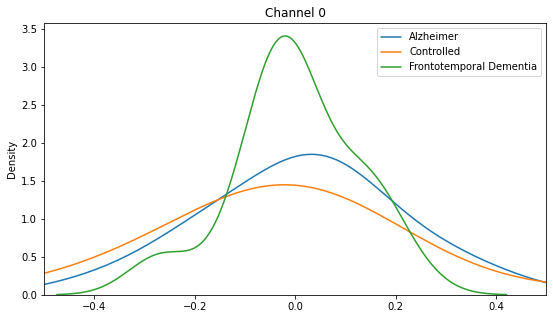

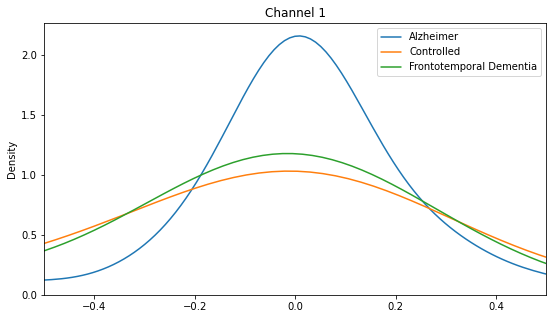

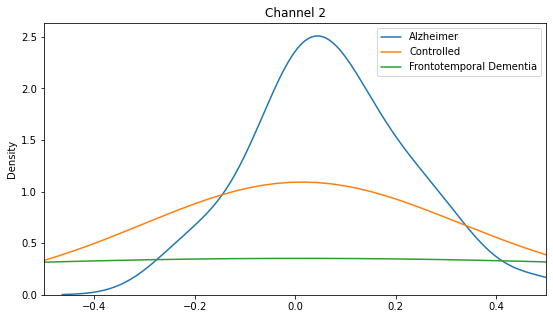

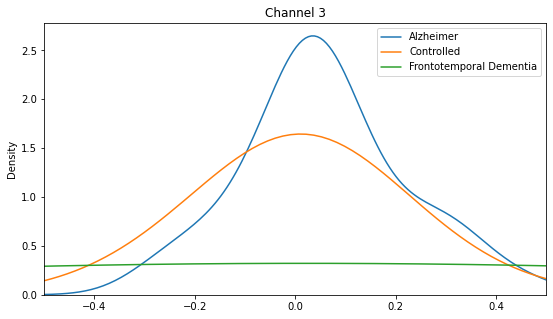

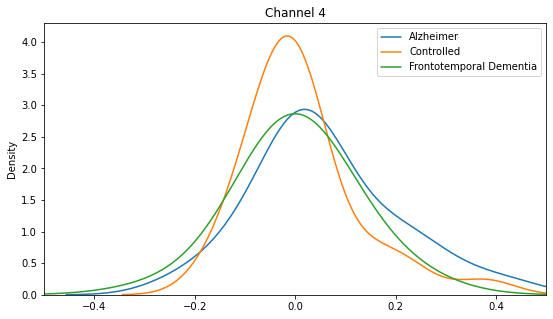

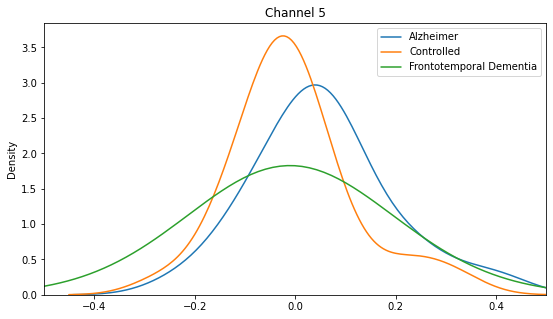

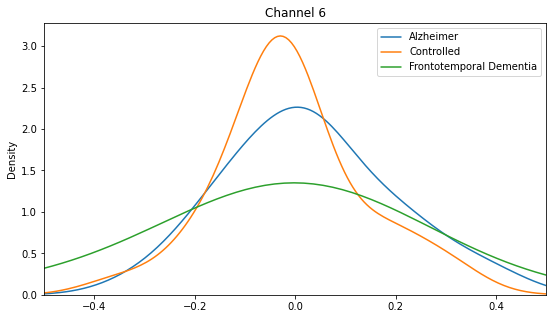

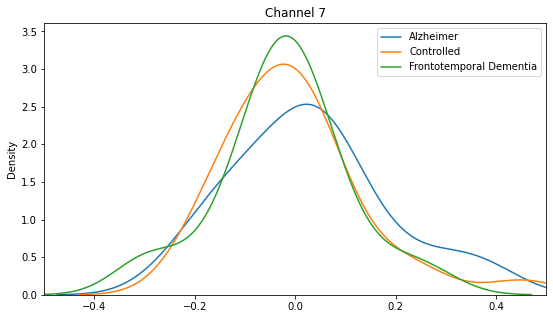

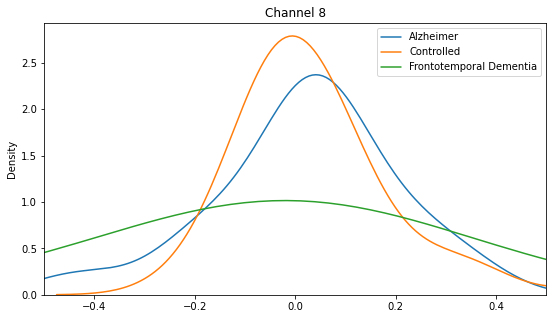

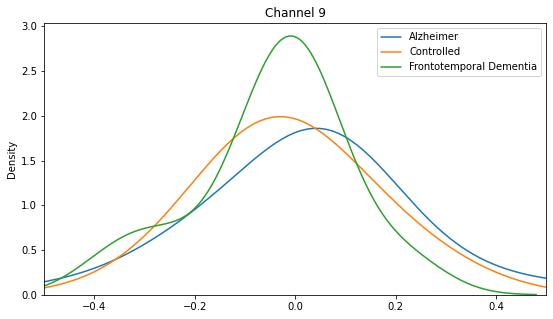

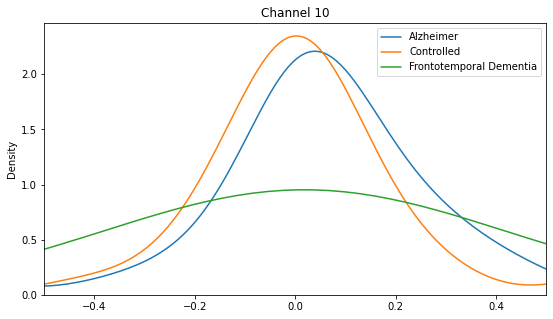

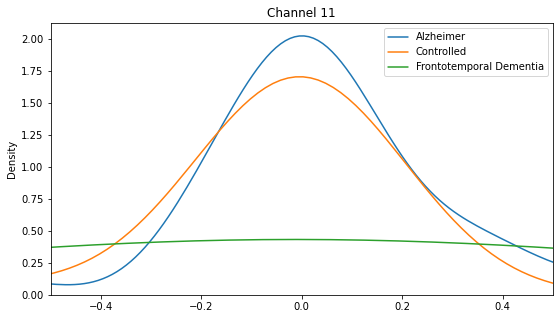

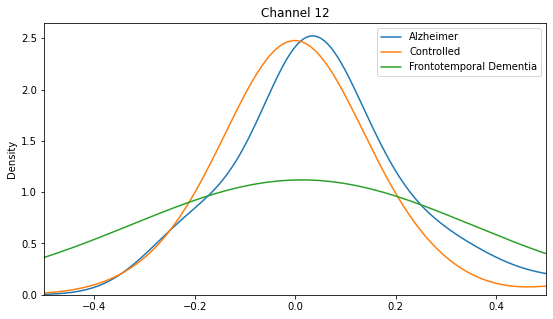

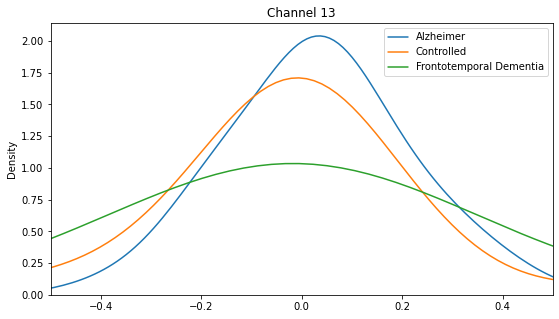

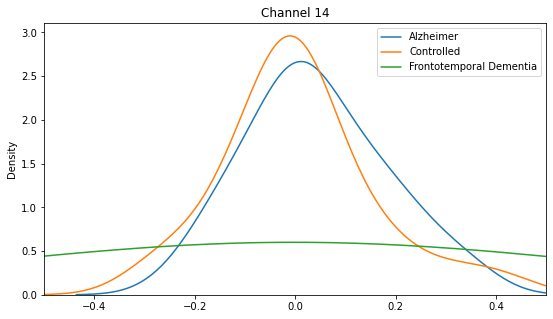

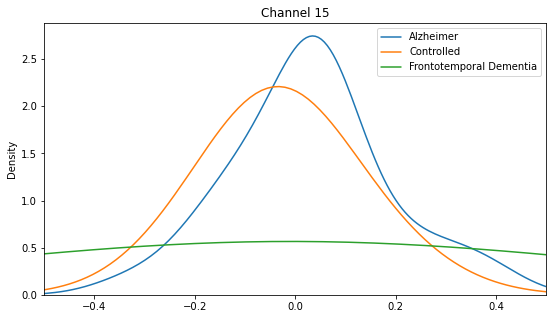

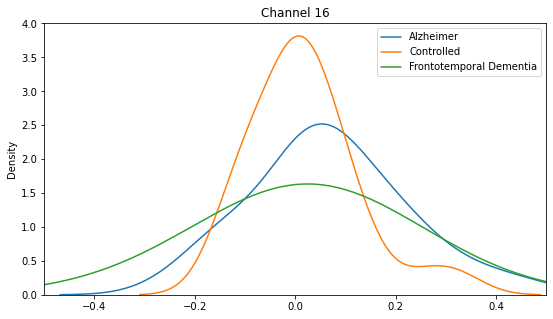

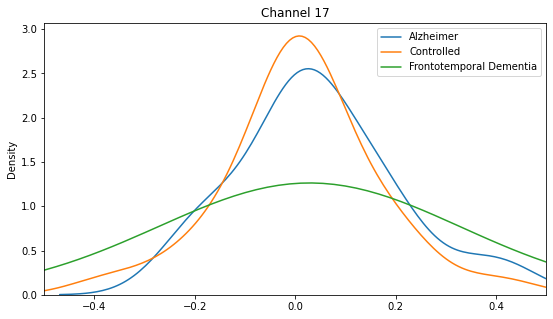

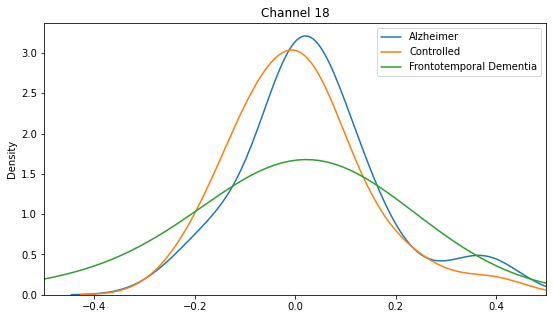

In [79]:
for ch in range(19):
    means = [participants[i][0][ch].mean() for i in range(len(participants))]
    groups = [participants[i][3] for i in range(len(participants))]
    fig, ax = plt.subplots()
    #sns.set_theme(style="darkgrid")
    sns.set_style({'axes.edgecolor': '0', 'axes.facecolor': 'white', 'axes.grid': True, 'axes.linewidth': 1.5, 'grid.color': '.8', 'grid.linestyle': '-', 'image.cmap': 'rocket_r', 'legend.frameon': True, 'legend.numpoints': 1, 'legend.scatterpoints': 1, 'lines.solid_capstyle': 'round', 'text.color': '0', 'xtick.direction': 'out', 'xtick.major.size': 6.0, 'xtick.minor.size': 3.0, 'ytick.direction': 'out', 'ytick.major.size': 6.0, 'ytick.minor.size': 3.0})

    sns.distplot([means[i] for i in range(len(means)) if groups[i] == 'A'], hist=False, label='Alzheimer')
    sns.distplot([means[i] for i in range(len(means)) if groups[i] == 'C'], hist=False, label='Controlled')
    sns.distplot([means[i] for i in range(len(means)) if groups[i] == 'F'], hist=False, label='Frontotemporal Dementia')

    plt.grid()
    plt.xlim(-0.5, 0.5)
    plt.title(f"Channel {ch}")
    plt.legend()
    fig.set_size_inches(9, 5)
    fig.savefig(f"../data/plots/means_ch{ch}.png")

#### Comment:
We can see that distribution of means is often wider for frontotemporal dementia, while Alzheimer and control groups have similar distributions. That means that the mean of the channel is a good feature to distinguish frontotemporal dementia from Alzheimer and control groups, but not Alzheimer from control groups.

In [ ]:
stds

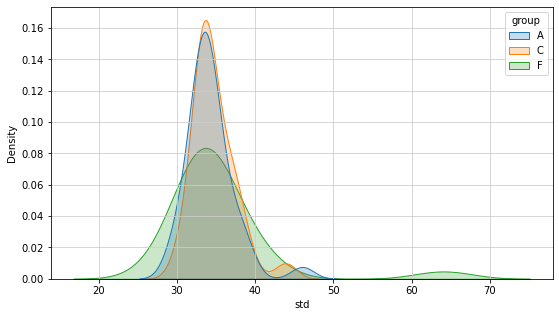

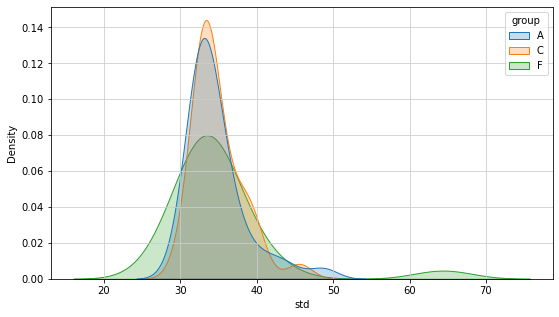

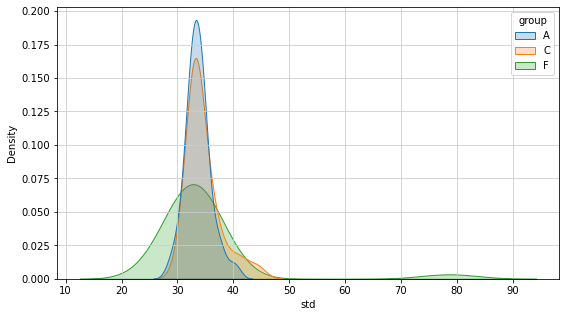

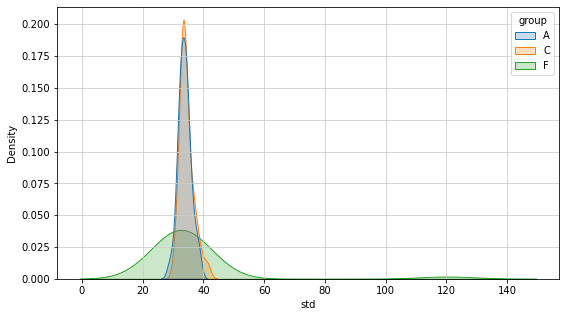

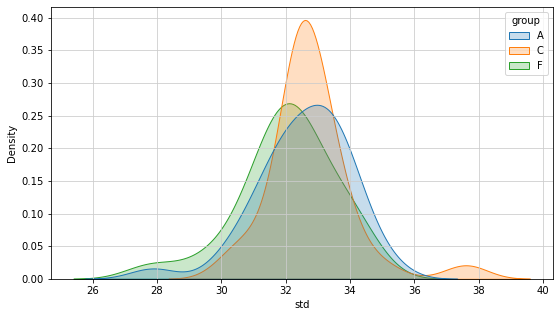

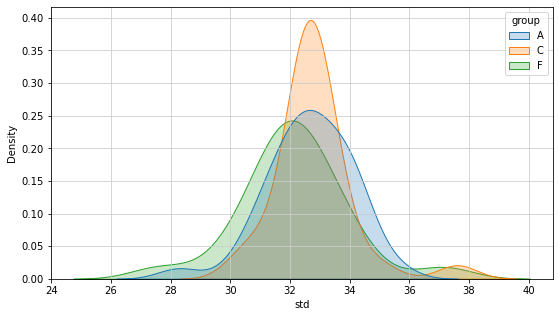

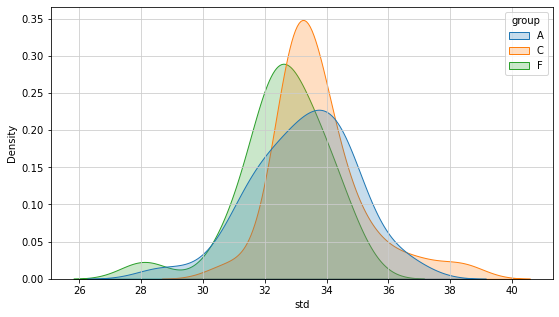

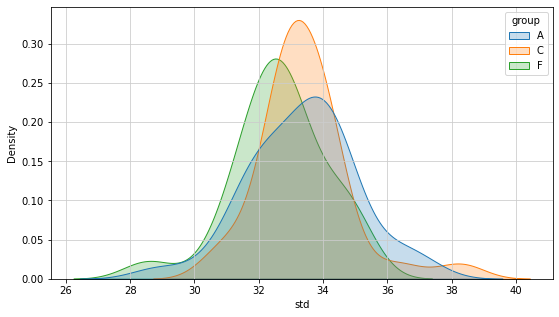

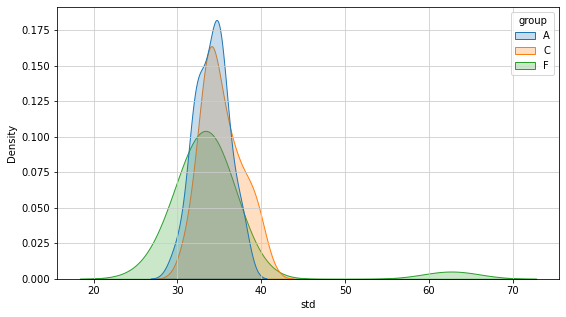

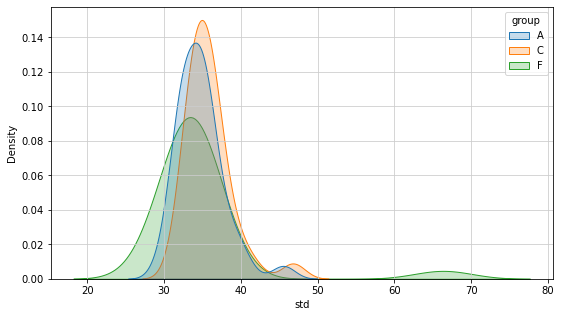

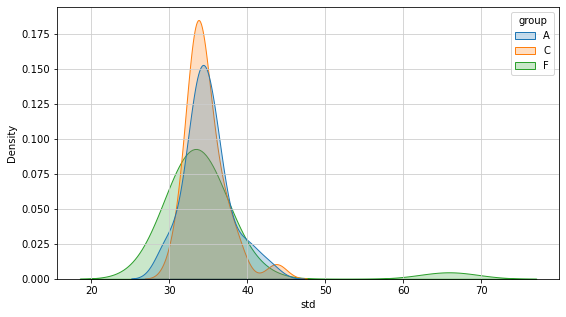

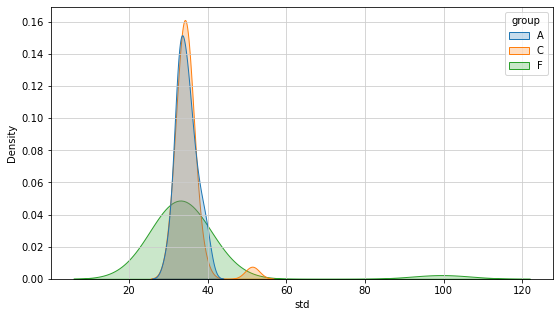

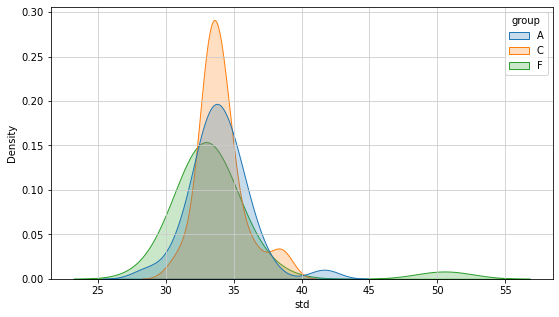

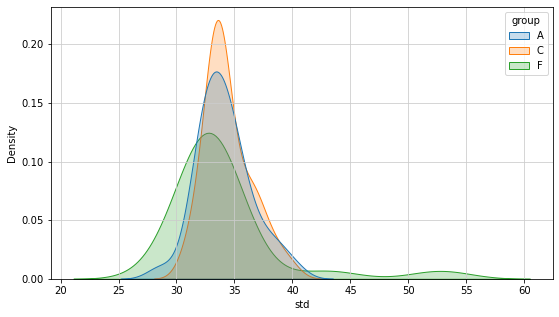

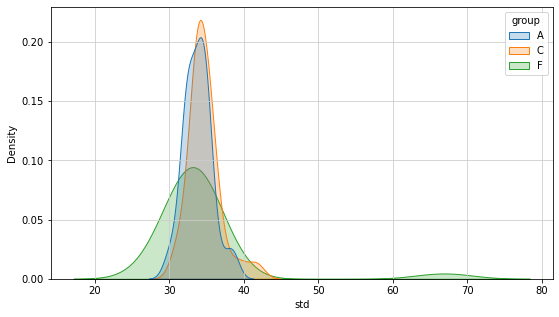

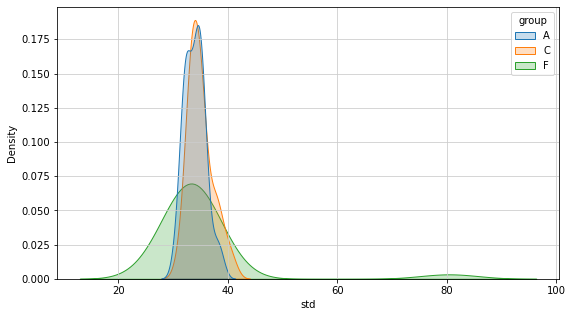

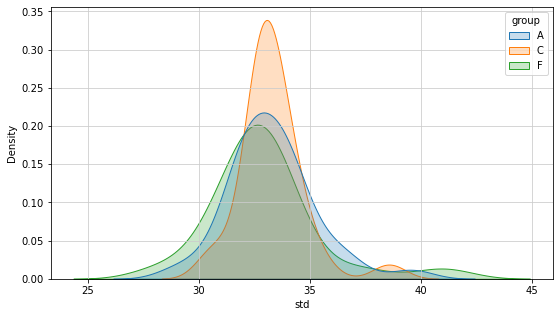

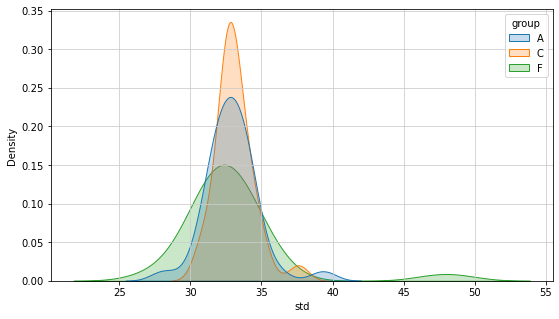

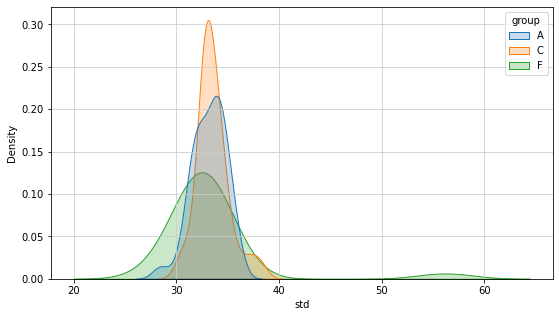

In [80]:
for ch in range(19):
    stds = [participants[i][0][ch].std() for i in range(len(participants))]
    groups = [participants[i][3] for i in range(len(participants))]
    fig, ax = plt.subplots()
    sns.set_style({'axes.edgecolor': '0', 'axes.facecolor': 'white', 'axes.grid': True, 'axes.linewidth': 1.5, 'grid.color': '.8', 'grid.linestyle': '-', 'image.cmap': 'rocket_r', 'legend.frameon': True, 'legend.numpoints': 1, 'legend.scatterpoints': 1, 'lines.solid_capstyle': 'round', 'text.color': '0', 'xtick.direction': 'out', 'xtick.major.size': 6.0, 'xtick.minor.size': 3.0, 'ytick.direction': 'out', 'ytick.major.size': 6.0, 'ytick.minor.size': 3.0})

    data = pd.DataFrame({'std': stds, 'group': groups})


    #std_a = [stds[i] for i in range(len(stds)) if groups[i] == 'A']
    #std_c = [stds[i] for i in range(len(stds)) if groups[i] == 'C']
    #std_f = [stds[i] for i in range(len(stds)) if groups[i] == 'F']
    
    sns.kdeplot(data=data, x='std', hue='group', fill=True, common_norm=False)

    
    #sns.displot([stds[i] for i in range(len(stds)) if groups[i] == 'C'], kind='kde', label='Controlled')
    #sns.displot([stds[i] for i in range(len(stds)) if groups[i] == 'F'], kind='kde', label='Frontotemporal Dementia')

    #plt.grid()
    #plt.xlim(-0.5, 0.5)
    #plt.title(f"Channel {ch}")
    #plt.legend()
    fig.set_size_inches(9, 5)
    fig.savefig(f"../data/plots/std_ch{ch}.png")

## Plotting the ditribution of participant kurtosis for each channel
### 1 plot = 1 channel - alpha, beta, gamma 
### for the first epoch

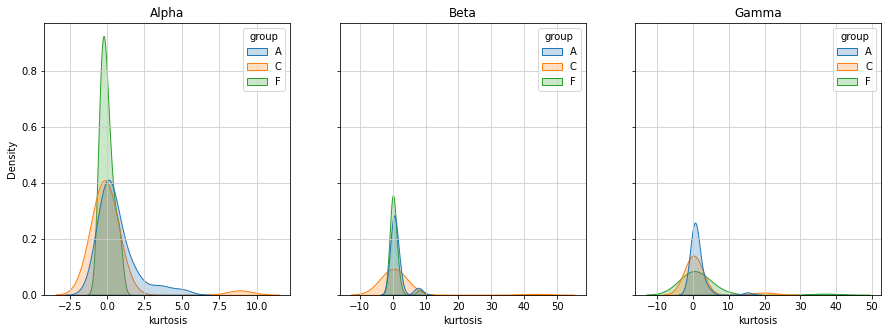

In [102]:
for ch in range(1):
    kurt_alpha = [ss.kurtosis(alpha_rhythm(participants[i][0][ch])[0:5*fs]) for i in range(len(participants))]
    kurt_beta = [ss.kurtosis(beta_rhythm(participants[i][0][ch])[0:5*fs]) for i in range(len(participants))]
    kurt_gamma = [ss.kurtosis(gamma_rhythm(participants[i][0][ch])[0:5*fs]) for i in range(len(participants))]

    groups = [participants[i][3] for i in range(len(participants))]

    data_alpha = pd.DataFrame({'kurtosis': kurt_alpha, 'group': groups})
    data_beta = pd.DataFrame({'kurtosis': kurt_beta, 'group': groups})
    data_gamma = pd.DataFrame({'kurtosis': kurt_gamma, 'group': groups})

    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    sns.set_style({'axes.edgecolor': '0', 'axes.facecolor': 'white', 'axes.grid': True, 'axes.linewidth': 1.5, 'grid.color': '.8', 'grid.linestyle': '-', 'image.cmap': 'rocket_r', 'legend.frameon': True, 'legend.numpoints': 1, 'legend.scatterpoints': 1, 'lines.solid_capstyle': 'round', 'text.color': '0', 'xtick.direction': 'out', 'xtick.major.size': 6.0, 'xtick.minor.size': 3.0, 'ytick.direction': 'out', 'ytick.major.size': 6.0, 'ytick.minor.size': 3.0})
    sns.kdeplot(ax=axes[0], data=data_alpha, x='kurtosis', hue='group', fill=True, common_norm=False)
    sns.kdeplot(ax=axes[1], data=data_beta, x='kurtosis', hue='group', fill=True, common_norm=False)
    sns.kdeplot(ax=axes[2], data=data_gamma, x='kurtosis', hue='group', fill=True, common_norm=False)
    axes[0].set_title('Alpha')
    axes[1].set_title('Beta')
    axes[2].set_title('Gamma')

    fig.savefig(f"../data/plots/kurt_ch{ch}.png")

## Plotting the ditribution of participant skewness for each channel

### 1 plot = 1 channel, for the first epoch

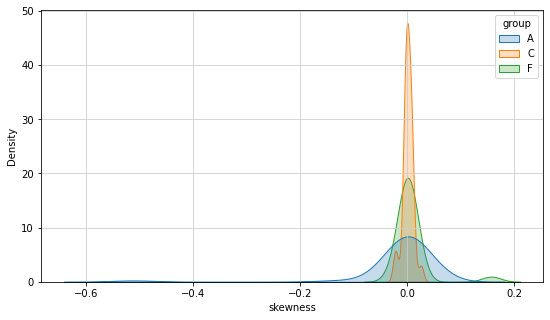

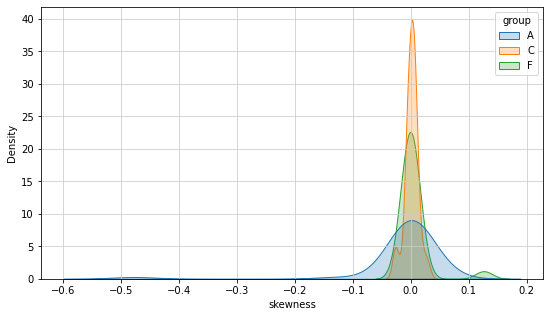

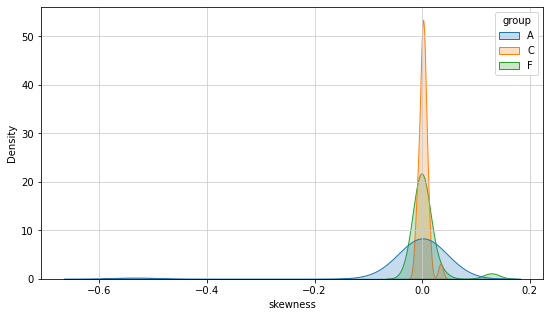

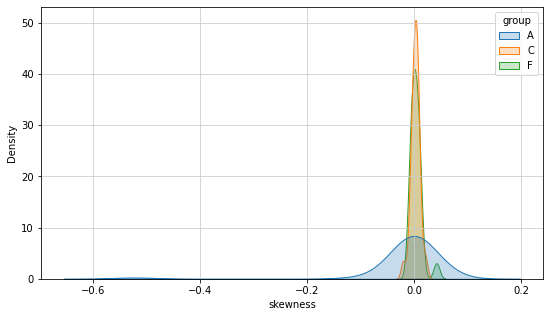

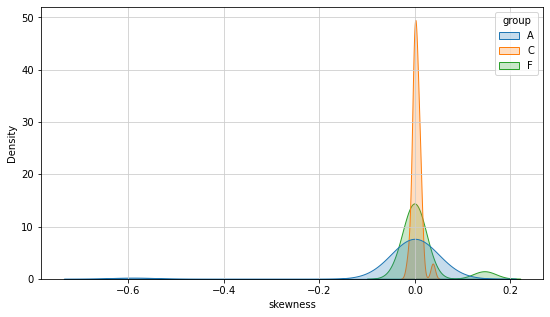

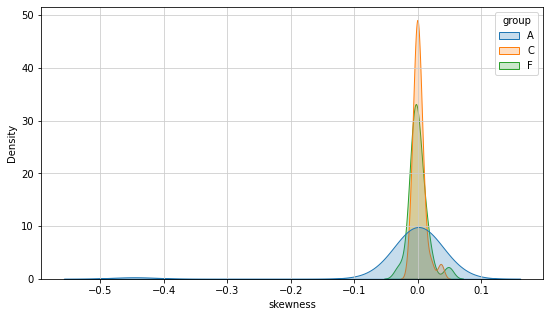

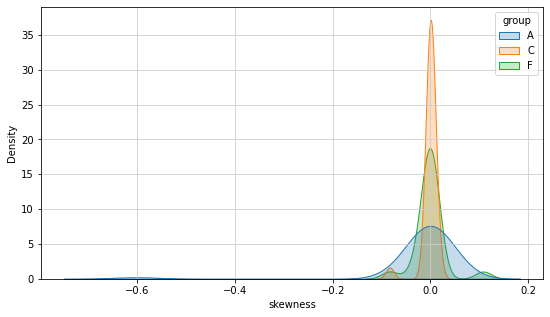

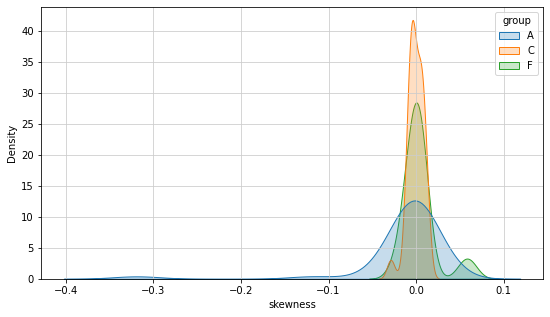

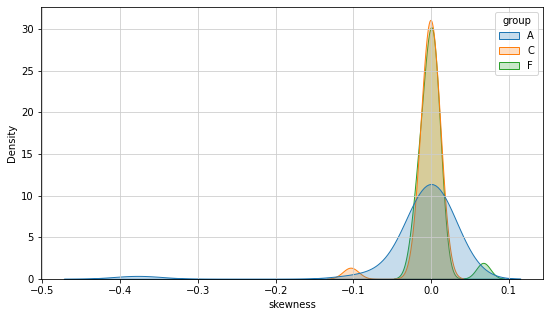

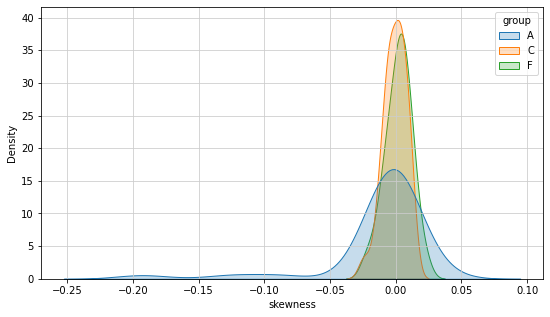

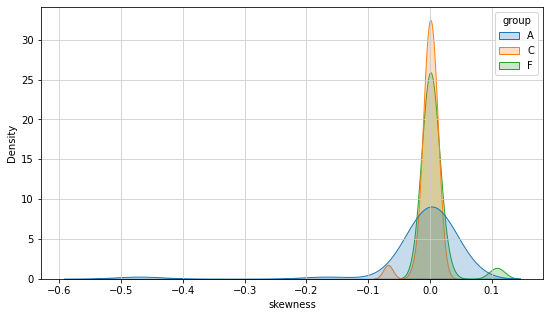

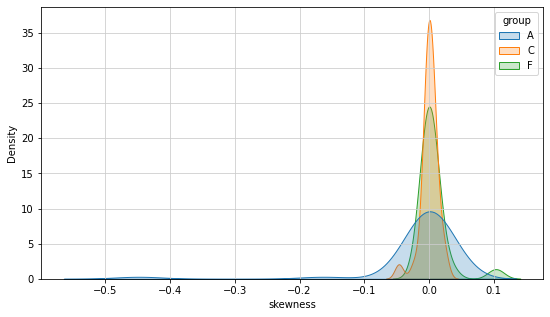

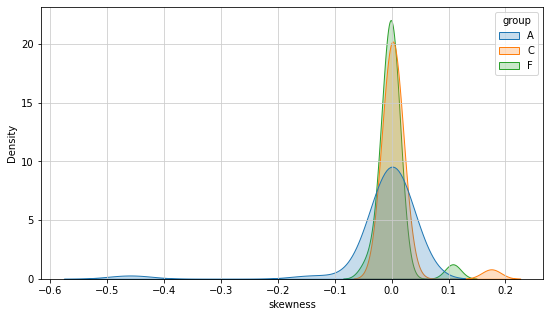

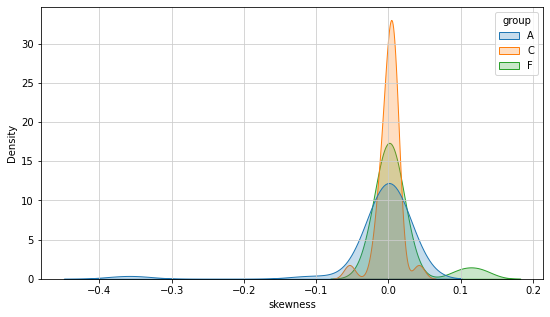

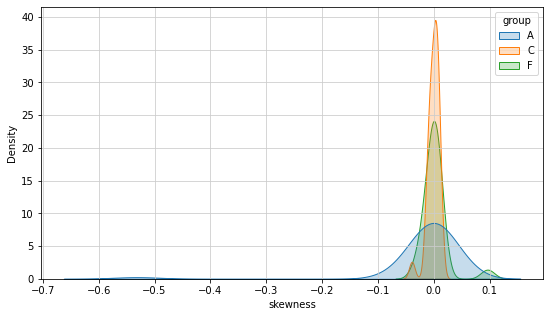

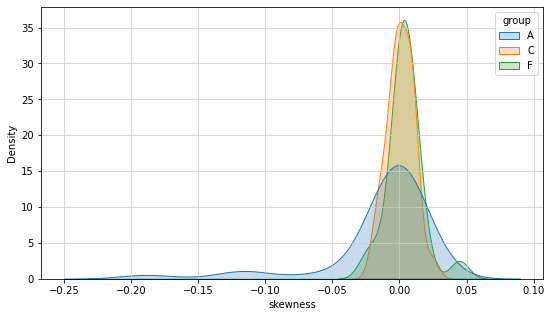

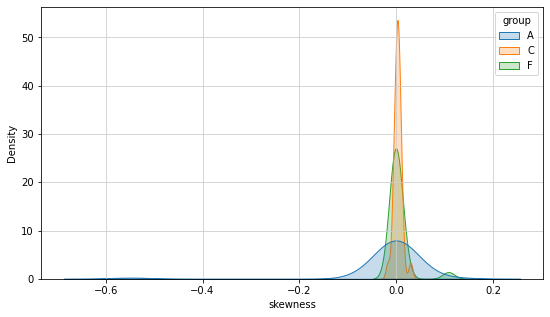

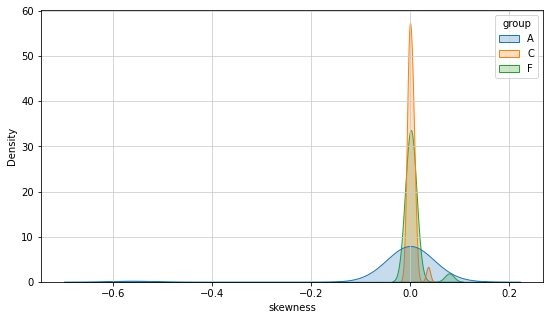

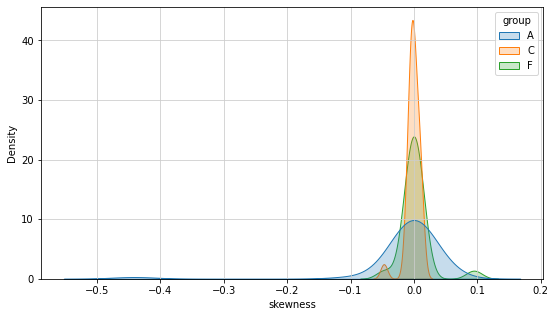

In [83]:
for ch in range(19):
    kurt = [ss.skew(alpha_rhythm(participants[i][0][ch])[0:5*fs]) for i in range(len(participants))]
    groups = [participants[i][3] for i in range(len(participants))]
    fig, ax = plt.subplots()
    sns.set_style({'axes.edgecolor': '0', 'axes.facecolor': 'white', 'axes.grid': True, 'axes.linewidth': 1.5, 'grid.color': '.8', 'grid.linestyle': '-', 'image.cmap': 'rocket_r', 'legend.frameon': True, 'legend.numpoints': 1, 'legend.scatterpoints': 1, 'lines.solid_capstyle': 'round', 'text.color': '0', 'xtick.direction': 'out', 'xtick.major.size': 6.0, 'xtick.minor.size': 3.0, 'ytick.direction': 'out', 'ytick.major.size': 6.0, 'ytick.minor.size': 3.0})

    data = pd.DataFrame({'skewness': kurt, 'group': groups})

    sns.kdeplot(data=data, x='skewness', hue='group', fill=True, common_norm=False)

    fig.set_size_inches(9, 5)
    fig.savefig(f"../data/plots/skew_ch{ch}.png")

## Plotting the dependence of skewness and kurtosis for the particular channel 


In [120]:
import math

(-0.1, 0.15)

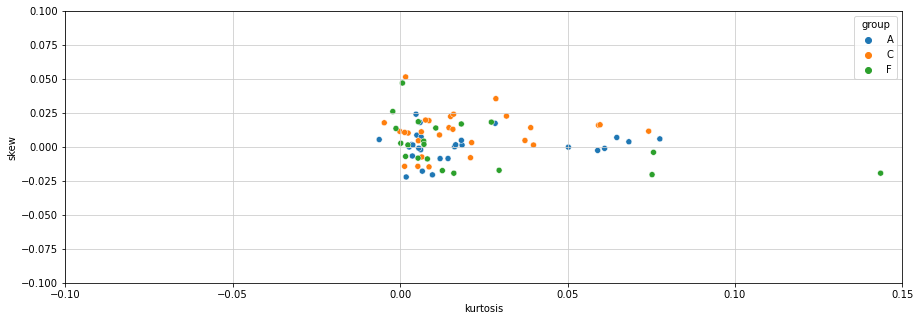

In [136]:
ch = 3
kurt = [ss.kurtosis(alpha_rhythm(participants[i][0][ch])) for i in range(len(participants))] 
skew = [ss.skew(alpha_rhythm(participants[i][0][ch])) for i in range(len(participants))]
kurt = kurt/(np.max(kurt) - np.min(kurt))
skew = skew/(np.max(skew) - np.min(skew))

groups = [participants[i][3] for i in range(len(participants))]

data = pd.DataFrame({'kurtosis': kurt, 'skew': skew, 'group': groups})

fig, axes = plt.subplots(figsize=(15, 5), sharey=True)
sns.set_style({'axes.edgecolor': '0', 'axes.facecolor': 'white', 'axes.grid': True, 'axes.linewidth': 1.5, 'grid.color': '.8', 'grid.linestyle': '-', 'image.cmap': 'rocket_r', 'legend.frameon': True, 'legend.numpoints': 1, 'legend.scatterpoints': 1, 'lines.solid_capstyle': 'round', 'text.color': '0', 'xtick.direction': 'out', 'xtick.major.size': 6.0, 'xtick.minor.size': 3.0, 'ytick.direction': 'out', 'ytick.major.size': 6.0, 'ytick.minor.size': 3.0})
sns.scatterplot(data=data, x='kurtosis', y='skew', hue='group')

axes.set_ylim(-0.1, 0.1)
axes.set_xlim(-0.1, 0.15) 
#fig.savefig(f"../data/plots/kurt_ch{ch}.png")